In [55]:
# import packages
import numpy as np
import pandas as pd
import os
import re
import tensorflow as tf
#tf.enable_eager_execution()
import tensorflow.keras as keras
from sklearn import metrics
from tensorflow.python.ops import math_ops
from tensorflow.python.keras import backend
from time import time
from sklearn.utils import resample

In [56]:
# import test dataset
test_input = "/home/jupyter/datasets/training_data/data_before_24hrs_icu/data_grouped_HADM_ID/padded_arrays/all_events_test.tfrecord"

In [57]:
# check test dataset for number of records
test_records = sum(1 for _ in tf.python_io.tf_record_iterator(test_input))
print(test_records)

6472


In [58]:
# assign file path to tfrecords dataset
test_filenames = [test_input]
test_dataset = tf.data.TFRecordDataset(test_filenames)

In [59]:
# Create Parse Functions

# Create a description of the features.  
feature_description = {
    'HOSPITAL_EXPIRE_FLAG': tf.FixedLenFeature([], dtype=tf.int64),
    'LOS': tf.FixedLenFeature([], dtype=tf.int64),
    'feature1': tf.VarLenFeature(dtype=tf.int64),
    'feature2': tf.VarLenFeature(dtype=tf.int64),
    'feature3': tf.VarLenFeature(dtype=tf.int64),
    'feature4': tf.VarLenFeature(dtype=tf.int64),
    'feature5': tf.VarLenFeature(dtype=tf.int64),
    'feature6': tf.VarLenFeature(dtype=tf.int64),
    'feature7': tf.VarLenFeature(dtype=tf.int64),
    'feature8': tf.VarLenFeature(dtype=tf.int64),
    'feature9': tf.VarLenFeature(dtype=tf.int64)
}

# Parse function for All Events Mortality
def _parse_function_all_events_mortality(example_proto):
    x = tf.parse_single_example(example_proto, feature_description)
    label = tf.cast(x['HOSPITAL_EXPIRE_FLAG'],dtype='int32')
    ch_events = tf.cast(tf.sparse.to_dense(x['feature1']),dtype='int32')
    inputcv_events = tf.cast(tf.sparse.to_dense(x['feature2']),dtype='int32')
    inputmv_events = tf.cast(tf.sparse.to_dense(x['feature3']),dtype='int32')
    lab_events = tf.cast(tf.sparse.to_dense(x['feature4']),dtype='int32')
    microbio_events = tf.cast(tf.sparse.to_dense(x['feature5']),dtype='int32')
    note_events = tf.cast(tf.sparse.to_dense(x['feature6']),dtype='int32')
    output_events = tf.cast(tf.sparse.to_dense(x['feature7']),dtype='int32')
    prescription_events = tf.cast(tf.sparse.to_dense(x['feature8']),dtype='int32')
    procedure_events = tf.cast(tf.sparse.to_dense(x['feature9']),dtype='int32')
    
    return ((ch_events,
                 inputcv_events,
                 inputmv_events,
                 lab_events,
                 microbio_events,
                 note_events,
                 output_events,
                 prescription_events,
                 procedure_events),
            label)#{'labels':label, 'ch_events':ch_events}

# Parse function for Chart Events Mortality
def _parse_function_ch_events_mortality(example_proto):
    x = tf.parse_single_example(example_proto, feature_description)
    label = tf.cast(x['HOSPITAL_EXPIRE_FLAG'],dtype='int32')
    ch_events = tf.cast(tf.sparse.to_dense(x['feature1']),dtype='int32')
    inputcv_events = tf.cast(tf.sparse.to_dense(x['feature2']),dtype='int32')
    inputmv_events = tf.cast(tf.sparse.to_dense(x['feature3']),dtype='int32')
    lab_events = tf.cast(tf.sparse.to_dense(x['feature4']),dtype='int32')
    microbio_events = tf.cast(tf.sparse.to_dense(x['feature5']),dtype='int32')
    note_events = tf.cast(tf.sparse.to_dense(x['feature6']),dtype='int32')
    output_events = tf.cast(tf.sparse.to_dense(x['feature7']),dtype='int32')
    prescription_events = tf.cast(tf.sparse.to_dense(x['feature8']),dtype='int32')
    procedure_events = tf.cast(tf.sparse.to_dense(x['feature9']),dtype='int32')
    
    return ((ch_events),label)#{'labels':label, 'ch_events':ch_events}

# Parse function for All Events Length of stay
def _parse_function_all_events_LOS(example_proto):
    x = tf.parse_single_example(example_proto, feature_description)
    label = tf.cast(x['LOS'],dtype='int32')
    ch_events = tf.cast(tf.sparse.to_dense(x['feature1']),dtype='int32')
    inputcv_events = tf.cast(tf.sparse.to_dense(x['feature2']),dtype='int32')
    inputmv_events = tf.cast(tf.sparse.to_dense(x['feature3']),dtype='int32')
    lab_events = tf.cast(tf.sparse.to_dense(x['feature4']),dtype='int32')
    microbio_events = tf.cast(tf.sparse.to_dense(x['feature5']),dtype='int32')
    note_events = tf.cast(tf.sparse.to_dense(x['feature6']),dtype='int32')
    output_events = tf.cast(tf.sparse.to_dense(x['feature7']),dtype='int32')
    prescription_events = tf.cast(tf.sparse.to_dense(x['feature8']),dtype='int32')
    procedure_events = tf.cast(tf.sparse.to_dense(x['feature9']),dtype='int32')
    
    return ((ch_events,
                 inputcv_events,
                 inputmv_events,
                 lab_events,
                 microbio_events,
                 note_events,
                 output_events,
                 prescription_events,
                 procedure_events),
            label)#{'labels':label, 'ch_events':ch_events}

# Parse Funtion for Chartevents Length of Stay
def _parse_function_ch_events_LOS(example_proto):
    x = tf.parse_single_example(example_proto, feature_description)
    label = tf.cast(x['LOS'],dtype='int32')
    ch_events = tf.cast(tf.sparse.to_dense(x['feature1']),dtype='int32')
    inputcv_events = tf.cast(tf.sparse.to_dense(x['feature2']),dtype='int32')
    inputmv_events = tf.cast(tf.sparse.to_dense(x['feature3']),dtype='int32')
    lab_events = tf.cast(tf.sparse.to_dense(x['feature4']),dtype='int32')
    microbio_events = tf.cast(tf.sparse.to_dense(x['feature5']),dtype='int32')
    note_events = tf.cast(tf.sparse.to_dense(x['feature6']),dtype='int32')
    output_events = tf.cast(tf.sparse.to_dense(x['feature7']),dtype='int32')
    prescription_events = tf.cast(tf.sparse.to_dense(x['feature8']),dtype='int32')
    procedure_events = tf.cast(tf.sparse.to_dense(x['feature9']),dtype='int32')
    
    return ((ch_events),label)#{'labels':label, 'ch_events':ch_events}

In [60]:
# Define custom layer funtion  
def call(inputs, mask=None):
    steps_axis = 1
    if mask is not None:
        mask = math_ops.cast(mask, backend.floatx())
        input_shape = inputs.shape.as_list()
        broadcast_shape = [-1, input_shape[steps_axis], 1]
        mask = array_ops.reshape(mask, broadcast_shape)
        inputs *= mask
        return backend.sum(inputs, axis=steps_axis) / (math_ops.reduce_sum(mask, axis=steps_axis)+backend.epsilon())
    else:
        return backend.mean(inputs, axis=steps_axis)

In [61]:
# Load Models which need to be evaluvated
model_path = "/home/jupyter/output/model/hypertuned/Mortality_all_events/model/1562973689/"
all_events_mortality = tf.contrib.saved_model.load_keras_model(model_path)
all_events_mortality.compile(optimizer=keras.optimizers.Adam(), loss= 'binary_crossentropy')
model_path = "/home/jupyter/output/model/hypertuned/Mortality_ch_events/model/1562967086/"
ch_events_mortality = tf.contrib.saved_model.load_keras_model(model_path)
ch_events_mortality.compile(optimizer=keras.optimizers.Adam(), loss= 'binary_crossentropy')
model_path = "/home/jupyter/output/model/hypertuned/LOS_all_events/model/1562981851/"
all_events_LOS = tf.contrib.saved_model.load_keras_model(model_path)
all_events_LOS.compile(optimizer=keras.optimizers.Adam(), loss= 'binary_crossentropy')
model_path = "/home/jupyter/output/model/hypertuned/LOS_ch_events/model/1562977458/"
ch_events_LOS = tf.contrib.saved_model.load_keras_model(model_path)
ch_events_LOS.compile(optimizer=keras.optimizers.Adam(), loss= 'binary_crossentropy')

In [62]:

# Define funtion to run inference on test set
def run_inference(model, _parse_function):
    batch_size = 128
    test_parsed_dataset = test_dataset.map(_parse_function,num_parallel_calls=tf.data.experimental.AUTOTUNE)
    test_parsed_dataset = test_parsed_dataset.batch(batch_size)
    test_parsed_dataset = test_parsed_dataset.repeat()

    results = model.predict(test_parsed_dataset,
                            steps=int(test_records/batch_size)+1,
                            verbose=1)

    test = test_dataset.map(_parse_function,num_parallel_calls=tf.data.experimental.AUTOTUNE)

    n = test.make_one_shot_iterator().get_next()
    sess = tf.Session()

    output_labels=[]

    for i in range(test_records):
      value=sess.run(n)
      output_labels.append(value[1])

    len(output_labels)

    result = pd.DataFrame(results, columns=['Predictions'])

    result['Predictions'] = round(result['Predictions'],3)

    result['pred_1'] = round(result['Predictions'])

    result['actual'] = output_labels

    return result

In [70]:
result_all_mortality = run_inference(model=all_events_mortality, _parse_function=_parse_function_all_events_mortality)
result_ch_mortality = run_inference(model=ch_events_mortality, _parse_function=_parse_function_ch_events_mortality)
result_all_LOS = run_inference(model=all_events_LOS, _parse_function=_parse_function_all_events_LOS)
result_ch_LOS = run_inference(model=ch_events_LOS, _parse_function=_parse_function_ch_events_LOS)

51/51 [==============================] - 5s 107ms/step


In [63]:
# funtion to create AUC-ROC, PR-CURVE, Calibration Curve
def print_roc_pr_calibration_curve(model, _parse_function):
    result = run_inference(model = model, _parse_function=_parse_function)
    
    # Plotting AUROC Curve - Calculatae Metrics
    from sklearn import metrics
    y_ACTUAL= result['actual']
    scores_prob = result['Predictions']
    fpr, tpr, thresholds = metrics.roc_curve(y_ACTUAL, scores_prob, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    # Plotting AUROC Curve - Plot Curve
    import matplotlib.pyplot as plt
    roc_curve = plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic',fontdict={"size":20})
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate or Sensitivity', fontdict={"size":15})
    plt.xlabel('False Positive Rate or 1-Specificity',fontdict={"size":15})
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],linestyle='--',color='red', label = 'No Skill Line')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fontsize = 12)
    
    # Plotting Precision-Recall Curve - Calculate Metrics
    y_ACTUAL = result['actual']
    scores_prob = result['Predictions']
    yhat = result['pred_1']
    precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
    prc_auc = metrics.auc(recall,precision)
    f1 = metrics.f1_score(y_ACTUAL, yhat)
    ap = metrics.average_precision_score(y_ACTUAL, yhat)
    mortality_ratio = round(sum(result['actual'])/(len(result['actual'])),2)
     # Plotting Precision-Recall Curve - PLot Curve
    pr_curve = plt.figure(figsize=(8,6))
    plt.title('Precision Recall Curve',fontdict={"size":20})
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision',fontdict={"size":15})
    plt.xlabel('Recall',fontdict={"size":15})
    plt.plot(recall, precision, label = 'F1=%.2f  AUC=%.2f' % (f1, prc_auc))
    positive_class_ratio = mortality_ratio
    plt.plot([0, 1], [positive_class_ratio, positive_class_ratio],linestyle='--',color='red', label = 'No Skill Line')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)

    # Plotting Calibration curve
    from sklearn.calibration import calibration_curve
    x, y = calibration_curve(result['actual'], result['Predictions'], n_bins = 10, strategy='uniform')
    import matplotlib.pyplot as plt
    claibration_curve = plt.figure(figsize=(8,6))
    plt.title('Calibration Curve',fontdict={"size":20})
    plt.plot(x,y, marker = 'o', color = 'orange')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black', label = 'Perfectly Calibrated')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
    plt.ylabel('Fraction of Positives',fontdict={"size":15})
    plt.xlabel('Mean Predicted value',fontdict={"size":15})
    return plt.show()

### Plot AUCROC, PR-AUC, Calibration Curves

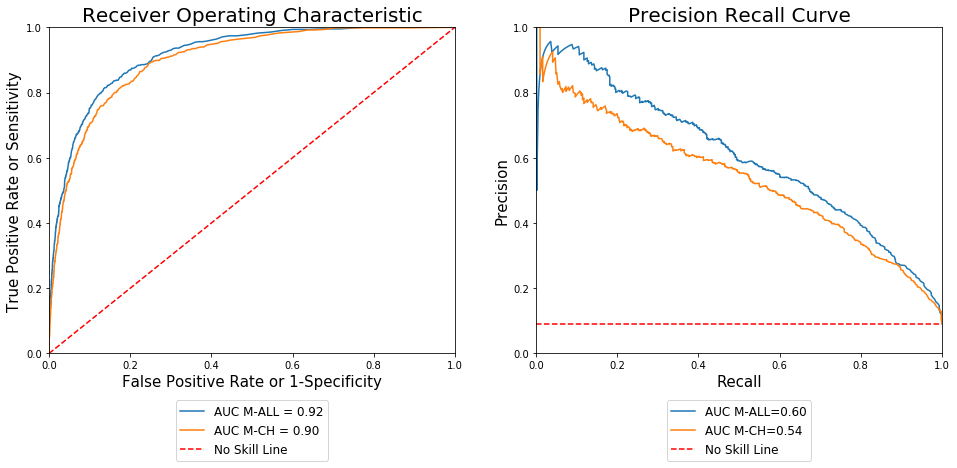

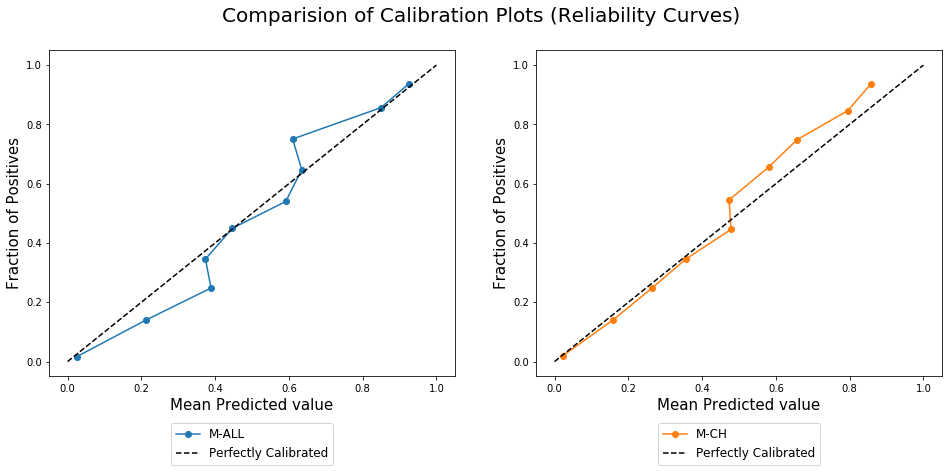

In [273]:
# Plotting AUROC Curve - Calculatae Metrics
from sklearn import metrics
def calc_aucroc_data(result):
    y_ACTUAL= result['actual']
    scores_prob = result['Predictions']
    fpr, tpr, thresholds = metrics.roc_curve(y_ACTUAL, scores_prob, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    return fpr, tpr, thresholds, roc_auc

def calc_aucpr_data(result):
    y_ACTUAL = result['actual']
    scores_prob = result['Predictions']
    yhat = result['pred_1']
    precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
    prc_auc = metrics.auc(recall,precision)
    f1 = metrics.f1_score(y_ACTUAL, yhat)
    ap = metrics.average_precision_score(y_ACTUAL, yhat)
    mortality_ratio = round(sum(result['actual'])/(len(result['actual'])),2)
    return recall, precision, f1, prc_auc, mortality_ratio

fpr_am, tpr_am, thresholds_am, roc_auc_am = calc_aucroc_data(result_all_mortality)
fpr_cm, tpr_cm, thresholds_cm, roc_auc_cm = calc_aucroc_data(result_ch_mortality)
recall_am, precision_am, f1_am, prc_auc_am, mortality_ratio = calc_aucpr_data(result_all_mortality)
recall_cm, precision_cm, f1_cm, prc_auc_cm, mortality_ratio = calc_aucpr_data(result_ch_mortality)



import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))

# Plotting AUROC Curve - Plot Curve
ax1.set_title('Receiver Operating Characteristic',fontdict={"size":20})
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate or Sensitivity', fontdict={"size":15})
ax1.set_xlabel('False Positive Rate or 1-Specificity',fontdict={"size":15})
ax1.plot(fpr_am, tpr_am, label = 'AUC M-ALL = %0.2f' % roc_auc_am)
ax1.plot(fpr_cm, tpr_cm, label = 'AUC M-CH = %0.2f' % roc_auc_cm)
ax1.plot([0, 1], [0, 1],linestyle='--',color='red', label = 'No Skill Line')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fontsize = 12)  

# Plotting Precision-Recall Curve - PLot Curve
ax2.set_title('Precision Recall Curve',fontdict={"size":20})
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_ylabel('Precision',fontdict={"size":15})
ax2.set_xlabel('Recall',fontdict={"size":15})
ax2.plot(recall_am, precision_am, label = 'AUC M-ALL=%.2f' % (prc_auc_am))
ax2.plot(recall_cm, precision_cm, label = 'AUC M-CH=%.2f' % (prc_auc_cm))
positive_class_ratio = mortality_ratio
ax2.plot([0, 1], [positive_class_ratio, positive_class_ratio],linestyle='--',color='red', label = 'No Skill Line')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
fig.show()


# Plotting Calibration curve
from sklearn.calibration import calibration_curve
x_am, y_am = calibration_curve(result_all_mortality['actual'], result_all_mortality['Predictions'], n_bins = 10, strategy='uniform')
x_cm, y_cm = calibration_curve(result_ch_mortality['actual'], result_ch_mortality['Predictions'], n_bins = 10, strategy='uniform')

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))
fig.suptitle('Comparision of Calibration Plots (Reliability Curves)', fontsize=20)
ax1.plot(x_am, y_am, marker = 'o', color = 'tab:blue', label = 'M-ALL')
ax1.plot([0, 1], [0, 1],linestyle='--',color='black', label = 'Perfectly Calibrated')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
ax1.set_ylabel('Fraction of Positives',fontdict={"size":15})
ax1.set_xlabel('Mean Predicted value',fontdict={"size":15})


ax2.plot(x_cm, y_cm, marker = 'o', color = 'tab:orange', label = 'M-CH')
ax2.plot([0, 1], [0, 1],linestyle='--',color='black', label = 'Perfectly Calibrated')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
ax2.set_ylabel('Fraction of Positives',fontdict={"size":15})
ax2.set_xlabel('Mean Predicted value',fontdict={"size":15})

fig.show()

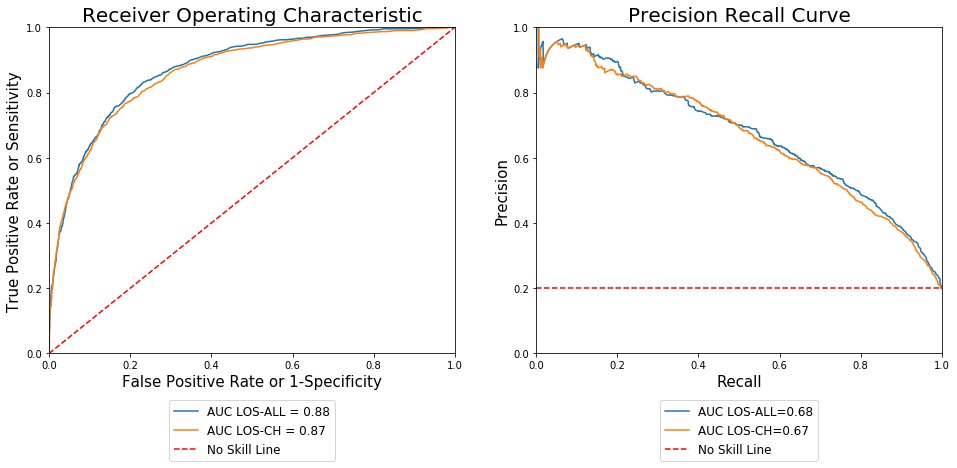

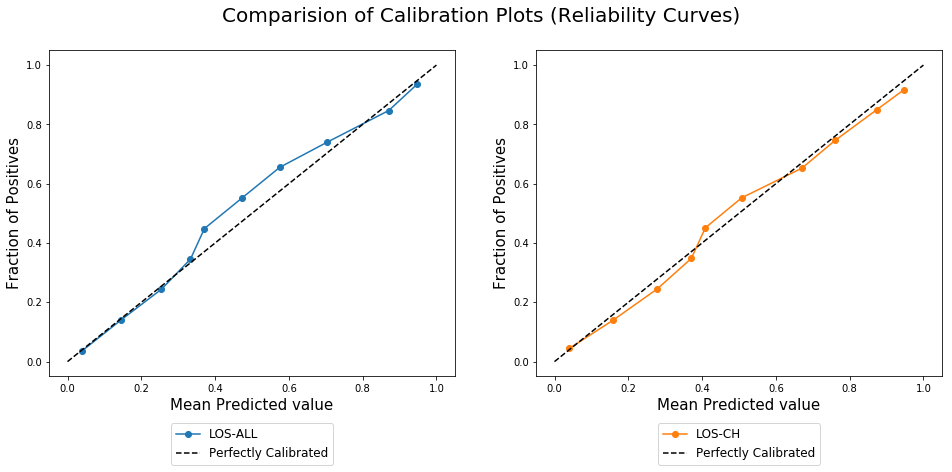

In [274]:
# Plotting AUROC Curve - Calculatae Metrics
from sklearn import metrics
def calc_aucroc_data(result):
    y_ACTUAL= result['actual']
    scores_prob = result['Predictions']
    fpr, tpr, thresholds = metrics.roc_curve(y_ACTUAL, scores_prob, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    return fpr, tpr, thresholds, roc_auc

def calc_aucpr_data(result):
    y_ACTUAL = result['actual']
    scores_prob = result['Predictions']
    yhat = result['pred_1']
    precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
    prc_auc = metrics.auc(recall,precision)
    f1 = metrics.f1_score(y_ACTUAL, yhat)
    ap = metrics.average_precision_score(y_ACTUAL, yhat)
    mortality_ratio = round(sum(result['actual'])/(len(result['actual'])),2)
    return recall, precision, f1, prc_auc, mortality_ratio

fpr_am, tpr_am, thresholds_am, roc_auc_am = calc_aucroc_data(result_all_LOS)
fpr_cm, tpr_cm, thresholds_cm, roc_auc_cm = calc_aucroc_data(result_ch_LOS)
recall_am, precision_am, f1_am, prc_auc_am, mortality_ratio = calc_aucpr_data(result_all_LOS)
recall_cm, precision_cm, f1_cm, prc_auc_cm, mortality_ratio = calc_aucpr_data(result_ch_LOS)



import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))

# Plotting AUROC Curve - Plot Curve
ax1.set_title('Receiver Operating Characteristic',fontdict={"size":20})
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate or Sensitivity', fontdict={"size":15})
ax1.set_xlabel('False Positive Rate or 1-Specificity',fontdict={"size":15})
ax1.plot(fpr_am, tpr_am, label = 'AUC LOS-ALL = %0.2f' % roc_auc_am)
ax1.plot(fpr_cm, tpr_cm, label = 'AUC LOS-CH = %0.2f' % roc_auc_cm)
ax1.plot([0, 1], [0, 1],linestyle='--',color='red', label = 'No Skill Line')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fontsize = 12)  

# Plotting Precision-Recall Curve - PLot Curve
ax2.set_title('Precision Recall Curve',fontdict={"size":20})
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_ylabel('Precision',fontdict={"size":15})
ax2.set_xlabel('Recall',fontdict={"size":15})
ax2.plot(recall_am, precision_am, label = 'AUC LOS-ALL=%.2f' % (prc_auc_am))
ax2.plot(recall_cm, precision_cm, label = 'AUC LOS-CH=%.2f' % (prc_auc_cm))
positive_class_ratio = mortality_ratio
ax2.plot([0, 1], [positive_class_ratio, positive_class_ratio],linestyle='--',color='red', label = 'No Skill Line')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
fig.show()


# Plotting Calibration curve
from sklearn.calibration import calibration_curve
x_am, y_am = calibration_curve(result_all_LOS['actual'], result_all_LOS['Predictions'], n_bins = 10, strategy='uniform')
x_cm, y_cm = calibration_curve(result_ch_LOS['actual'], result_ch_LOS['Predictions'], n_bins = 10, strategy='uniform')

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))
fig.suptitle('Comparision of Calibration Plots (Reliability Curves)', fontsize=20)
ax1.plot(x_am, y_am, marker = 'o', color = 'tab:blue', label = 'LOS-ALL')
ax1.plot([0, 1], [0, 1],linestyle='--',color='black', label = 'Perfectly Calibrated')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
ax1.set_ylabel('Fraction of Positives',fontdict={"size":15})
ax1.set_xlabel('Mean Predicted value',fontdict={"size":15})


ax2.plot(x_cm, y_cm, marker = 'o', color = 'tab:orange', label = 'LOS-CH')
ax2.plot([0, 1], [0, 1],linestyle='--',color='black', label = 'Perfectly Calibrated')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
ax2.set_ylabel('Fraction of Positives',fontdict={"size":15})
ax2.set_xlabel('Mean Predicted value',fontdict={"size":15})

fig.show()

In [183]:
def calculate_roc_auc(result):    
    from sklearn import metrics
    y_ACTUAL= result['actual']
    scores_prob = result['Predictions']
    fpr, tpr, thresholds = metrics.roc_curve(y_ACTUAL, scores_prob, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    
    y_ACTUAL = result['actual']
    scores_prob = result['Predictions']
    yhat = result['pred_1']
    precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
    prc_auc = metrics.auc(recall,precision)   
    return roc_auc, prc_auc

In [69]:
def bootstrapped_AUC(result):
    from sklearn.utils import resample
    from tqdm import tqdm

    n_iter = 10000
    roc_auc = list()
    prc_auc = list()


    for i in range(n_iter):
        #Calculating AUROC for each sample
        result_sample = resample(result, n_samples = len(result))
        y_ACTUAL= result_sample['actual']
        scores_prob = result_sample['Predictions']
        fpr, tpr, thresholds = metrics.roc_curve(y_ACTUAL, scores_prob, pos_label=1)
        roc_auc.append(metrics.auc(fpr, tpr))

        #calculate AUPRC for each sample
        y_ACTUAL = result_sample['actual']
        scores_prob = result_sample['Predictions']
        yhat = result_sample['pred_1']
        precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
        prc_auc.append(metrics.auc(recall,precision))
    
    return roc_auc, prc_auc

In [71]:
%%time
roc_auc_all_mortality,pr_auc_all_mortality  = bootstrapped_AUC(result_all_mortality)
roc_auc_ch_mortality,pr_auc_ch_mortality  = bootstrapped_AUC(result_ch_mortality)
roc_auc_all_LOS,pr_auc_all_LOS  = bootstrapped_AUC(result_all_LOS)
roc_auc_ch_LOS,pr_auc_ch_LOS  = bootstrapped_AUC(result_ch_LOS)

CPU times: user 2min 40s, sys: 0 ns, total: 2min 40s
Wall time: 2min 40s


### Calculate AUC Diff statistical Significance of Mortality Models

In [120]:
dict = {'roc_auc_all_mortality': roc_auc_all_mortality,
        'roc_auc_ch_mortality': roc_auc_ch_mortality,
        'pr_auc_all_mortality': pr_auc_all_mortality,
        'pr_auc_ch_mortality' : pr_auc_ch_mortality
       }

In [122]:
df_mortality = pd.DataFrame(dict)
df_mortality.head()

,pr_auc_all_mortality,pr_auc_ch_mortality,roc_auc_all_mortality,roc_auc_ch_mortality
0,0.630057,0.545121,0.922466,0.897311
1,0.598985,0.502864,0.915003,0.888115
2,0.592844,0.546850,0.922569,0.895858
3,0.619677,0.520400,0.923430,0.898362
4,0.585148,0.533136,0.918261,0.899391


In [299]:
df_mortality.describe(percentiles=[0.025,0.975])

,pr_auc_all_mortality,pr_auc_ch_mortality,roc_auc_all_mortality,roc_auc_ch_mortality,roc_auc_diff_mortality,pr_auc_diff_mortality
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.602235,0.536894,0.916711,0.900932,0.015779,0.065341
std,0.020779,0.021733,0.005359,0.005891,0.007932,0.030139
min,0.522825,0.445443,0.895174,0.879123,-0.014282,-0.054681
2.5%,0.560516,0.494015,0.906038,0.889132,0.000567,0.006235
50%,0.602356,0.536845,0.916831,0.901098,0.015657,0.065587
97.5%,0.642781,0.579120,0.926974,0.912168,0.031462,0.125043
max,0.674000,0.611185,0.935710,0.921333,0.044300,0.191208


In [301]:
x = df_mortality.describe(percentiles=[0.025,0.975])
for i in df_mortality.columns:
    print(i+' 95%CI: {:.4f}({:.4f},{:.4f})'.format(x[i]['mean'], x[i]['2.5%'], x[i]['97.5%']))

pr_auc_all_mortality 95%CI: 0.6022(0.5605,0.6428)
pr_auc_ch_mortality 95%CI: 0.5369(0.4940,0.5791)
roc_auc_all_mortality 95%CI: 0.9167(0.9060,0.9270)
roc_auc_ch_mortality 95%CI: 0.9009(0.8891,0.9122)
roc_auc_diff_mortality 95%CI: 0.0158(0.0006,0.0315)
pr_auc_diff_mortality 95%CI: 0.0653(0.0062,0.1250)


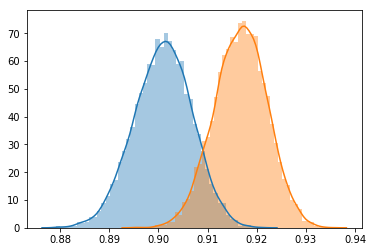

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(roc_auc_ch_mortality)
ax = sns.distplot(roc_auc_all_mortality)

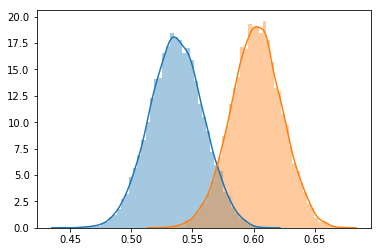

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(pr_auc_ch_mortality)
ax = sns.distplot(pr_auc_all_mortality)

In [125]:
df_mortality
df_mortality['roc_auc_diff_mortality'] = df_mortality['roc_auc_all_mortality']-df_mortality['roc_auc_ch_mortality']
df_mortality['pr_auc_diff_mortality'] = df_mortality['pr_auc_all_mortality']-df_mortality['pr_auc_ch_mortality']

In [279]:
df_mortality.describe(percentiles=[0.025,0.975])

,pr_auc_all_mortality,pr_auc_ch_mortality,roc_auc_all_mortality,roc_auc_ch_mortality,roc_auc_diff_mortality,pr_auc_diff_mortality
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.602235,0.536894,0.916711,0.900932,0.015779,0.065341
std,0.020779,0.021733,0.005359,0.005891,0.007932,0.030139
min,0.522825,0.445443,0.895174,0.879123,-0.014282,-0.054681
2.5%,0.560516,0.494015,0.906038,0.889132,0.000567,0.006235
50%,0.602356,0.536845,0.916831,0.901098,0.015657,0.065587
97.5%,0.642781,0.579120,0.926974,0.912168,0.031462,0.125043
max,0.674000,0.611185,0.935710,0.921333,0.044300,0.191208


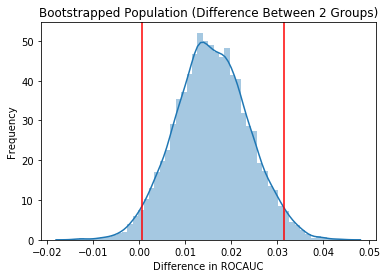

Lower bound: 0.0005669877784995483
Upper bound: 0.03146156478692552
Number of sample differences less than or equal to zero: 222
AUC Diff p-value 0.0222


In [130]:
differences = df_mortality['roc_auc_diff_mortality']
lower_bound = np.percentile(differences, 2.5)
upper_bound = np.percentile(differences, 97.5)

#fig = plt.figure(figsize=(10,3))
ax = sns.distplot(differences)

plt.xlabel('Difference in ROCAUC')
plt.ylabel('Frequency')
plt.axvline(lower_bound, color='r')
plt.axvline(upper_bound, color='r')
plt.title('Bootstrapped Population (Difference Between 2 Groups)')
plt.show()

diff_lessthan_zero = differences[differences <= 0].shape[0]
num_samples = len(df)
print('Lower bound: {}'.format(lower_bound))
print('Upper bound: {}'.format(upper_bound))
print('Number of sample differences less than or equal to zero: {}'.format(diff_lessthan_zero))
print('AUC Diff p-value {}'.format(diff_lessthan_zero/num_samples))

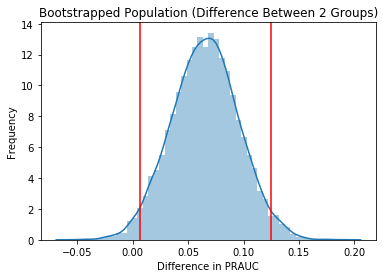

Lower bound: 0.006234690753011192
Upper bound: 0.12504328180311874
Number of sample differences less than or equal to zero: 146
AUC Diff p-value 0.0146


In [132]:
differences = df_mortality['pr_auc_diff_mortality']
lower_bound = np.percentile(differences, 2.5)
upper_bound = np.percentile(differences, 97.5)

#fig = plt.figure(figsize=(10,3))
ax = sns.distplot(differences)

plt.xlabel('Difference in PRAUC')
plt.ylabel('Frequency')
plt.axvline(lower_bound, color='r')
plt.axvline(upper_bound, color='r')
plt.title('Bootstrapped Population (Difference Between 2 Groups)')
plt.show()

diff_lessthan_zero = differences[differences <= 0].shape[0]
num_samples = len(df)
print('Lower bound: {}'.format(lower_bound))
print('Upper bound: {}'.format(upper_bound))
print('Number of sample differences less than or equal to zero: {}'.format(diff_lessthan_zero))
print('AUC Diff p-value {}'.format(diff_lessthan_zero/num_samples))

### Calculate AUC Diff statistical Significance of LOS Models

In [133]:
dict = {'roc_auc_all_LOS': roc_auc_all_LOS,
        'roc_auc_ch_LOS': roc_auc_ch_LOS,
        'pr_auc_all_LOS': pr_auc_all_LOS,
        'pr_auc_ch_LOS' : pr_auc_ch_LOS
       }

In [134]:
df_LOS = pd.DataFrame(dict)
df_LOS.head()

,pr_auc_all_LOS,pr_auc_ch_LOS,roc_auc_all_LOS,roc_auc_ch_LOS
0,0.659290,0.651189,0.873376,0.865762
1,0.676592,0.692100,0.880252,0.875685
2,0.684260,0.649420,0.875378,0.864026
3,0.684239,0.645216,0.879098,0.860821
4,0.667693,0.695585,0.870177,0.874140


In [135]:
df_LOS.describe(percentiles=[0.025,0.975])

,pr_auc_all_LOS,pr_auc_ch_LOS,roc_auc_all_LOS,roc_auc_ch_LOS
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.675354,0.666659,0.875600,0.867055
std,0.013458,0.013682,0.005385,0.005710
min,0.619575,0.606647,0.850655,0.845934
2.5%,0.648312,0.639278,0.864840,0.855689
50%,0.675610,0.666873,0.875665,0.867077
97.5%,0.700915,0.693200,0.885921,0.878264
max,0.726731,0.713076,0.895562,0.886129


In [281]:
x = df_LOS.describe(percentiles=[0.025,0.975])

In [297]:
for i in df_LOS.columns:
    print(i+' 95%CI: {:.4f}({:.4f},{:.4f})'.format(x[i]['mean'], x[i]['2.5%'], x[i]['97.5%']))


pr_auc_all_LOS 95%CI: 0.6754(0.6483,0.7009)
pr_auc_ch_LOS 95%CI: 0.6667(0.6393,0.6932)
roc_auc_all_LOS 95%CI: 0.8756(0.8648,0.8859)
roc_auc_ch_LOS 95%CI: 0.8671(0.8557,0.8783)
auc_diff_LOS 95%CI: 0.0085(-0.0068,0.0237)
pr_diff_LOS 95%CI: 0.0087(-0.0287,0.0459)
pr_auc_diff_LOS 95%CI: 0.0087(-0.0287,0.0459)


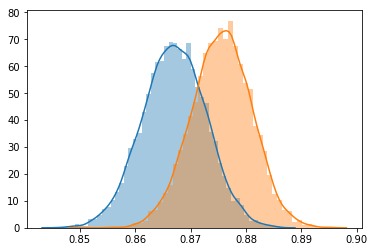

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(roc_auc_ch_LOS)
ax = sns.distplot(roc_auc_all_LOS)

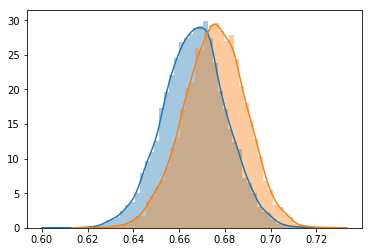

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
ay = sns.distplot(pr_auc_ch_LOS)
ay = sns.distplot(pr_auc_all_LOS)

In [172]:
df_LOS['auc_diff_LOS'] = df_LOS['roc_auc_all_LOS']-df_LOS['roc_auc_ch_LOS']
df_LOS['pr_auc_diff_LOS'] = df_LOS['pr_auc_all_LOS']-df_LOS['pr_auc_ch_LOS']

In [280]:
df_LOS.describe(percentiles=[0.025,0.975])

,pr_auc_all_LOS,pr_auc_ch_LOS,roc_auc_all_LOS,roc_auc_ch_LOS,auc_diff_LOS,pr_diff_LOS,pr_auc_diff_LOS
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.675354,0.666659,0.875600,0.867055,0.008546,0.008695,0.008695
std,0.013458,0.013682,0.005385,0.005710,0.007802,0.019094,0.019094
min,0.619575,0.606647,0.850655,0.845934,-0.022981,-0.064441,-0.064441
2.5%,0.648312,0.639278,0.864840,0.855689,-0.006803,-0.028719,-0.028719
50%,0.675610,0.666873,0.875665,0.867077,0.008652,0.008834,0.008834
97.5%,0.700915,0.693200,0.885921,0.878264,0.023704,0.045936,0.045936
max,0.726731,0.713076,0.895562,0.886129,0.037319,0.071581,0.071581


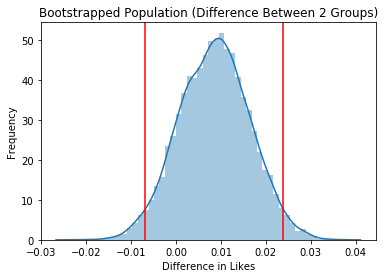

Lower bound: -0.006802833024520591
Upper bound: 0.023704123426093848
Number of sample differences less than or equal to zero: 1391
AUC Diff p-value 0.1391


In [174]:

differences = df_LOS['auc_diff_LOS']
lower_bound = np.percentile(differences, 2.5)
upper_bound = np.percentile(differences, 97.5)

#fig = plt.figure(figsize=(10,3))
ax = sns.distplot(differences)

plt.xlabel('Difference in Likes')
plt.ylabel('Frequency')
plt.axvline(lower_bound, color='r')
plt.axvline(upper_bound, color='r')
plt.title('Bootstrapped Population (Difference Between 2 Groups)')
plt.show()

diff_lessthan_zero = differences[differences <= 0].shape[0]
num_samples = len(df)
print('Lower bound: {}'.format(lower_bound))
print('Upper bound: {}'.format(upper_bound))
print('Number of sample differences less than or equal to zero: {}'.format(diff_lessthan_zero))
print('AUC Diff p-value {}'.format(diff_lessthan_zero/num_samples))

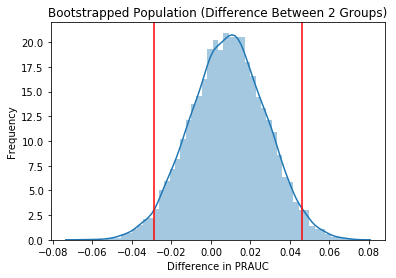

Lower bound: -0.02871896790547982
Upper bound: 0.04593649194522828
Number of sample differences less than or equal to zero: 3236
AUC Diff p-value 0.3236


In [175]:
differences = df_LOS['pr_auc_diff_LOS']
lower_bound = np.percentile(differences, 2.5)
upper_bound = np.percentile(differences, 97.5)

#fig = plt.figure(figsize=(10,3))
ax = sns.distplot(differences)

plt.xlabel('Difference in PRAUC')
plt.ylabel('Frequency')
plt.axvline(lower_bound, color='r')
plt.axvline(upper_bound, color='r')
plt.title('Bootstrapped Population (Difference Between 2 Groups)')
plt.show()

diff_lessthan_zero = differences[differences <= 0].shape[0]
num_samples = len(df)
print('Lower bound: {}'.format(lower_bound))
print('Upper bound: {}'.format(upper_bound))
print('Number of sample differences less than or equal to zero: {}'.format(diff_lessthan_zero))
print('AUC Diff p-value {}'.format(diff_lessthan_zero/num_samples))

### Bootstrap Hypothesis Testing Mortality

In [84]:
combined = pd.concat([result_all_mortality,result_ch_mortality])

In [201]:
perms_all_mortality = []
perms_ch_mortality = []
perms_all_mortality_pr = []
perms_ch_mortality_pr = []
dif_bootstrap_auc = []
dif_bootstrap_pr = []

In [202]:
%%time
for i in range(10000):
    np.random.seed(i)
    perms_all_mortality_roc, perms_all_mortality_pr = calculate_roc_auc(resample(combined, n_samples = len(result_all_mortality)))
    perms_ch_mortality_roc, perms_ch_mortality_pr  = calculate_roc_auc(resample(combined, n_samples = len(result_ch_mortality)))
    dif_bootstrap_auc.append(perms_all_mortality_roc-perms_ch_mortality_roc)
    dif_bootstrap_pr.append(perms_all_mortality_pr-perms_ch_mortality_pr)


CPU times: user 1min 29s, sys: 0 ns, total: 1min 29s
Wall time: 1min 29s


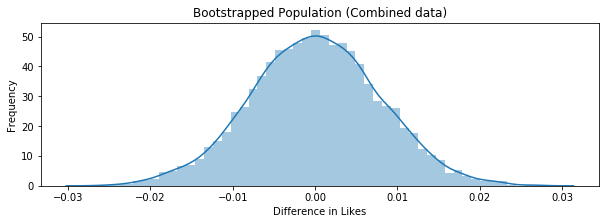

observed difference in AUROC: 0.0158322747580264
p-value: 0.0223


In [312]:
fig = plt.figure(figsize=(10,3))
ax = sns.distplot(dif_bootstrap_auc)

plt.xlabel('Difference in Likes')
plt.ylabel('Frequency')
plt.title('Bootstrapped Population (Combined data)')
plt.show()

# Observed Difference
obs_difs = (calculate_roc_auc(result_all_mortality)[0] - calculate_roc_auc(result_ch_mortality)[0])
print('observed difference in AUROC: {}'.format(obs_difs))
p_value = sum(dif_bootstrap_auc >= obs_difs)/10000
print('p-value: {}'.format(p_value))

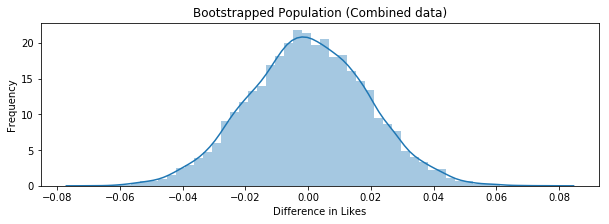

observed difference in AUROC: 0.06498497921296875
p-value: 0.0004


In [313]:
fig = plt.figure(figsize=(10,3))
ax = sns.distplot(dif_bootstrap_pr)

plt.xlabel('Difference in Likes')
plt.ylabel('Frequency')
plt.title('Bootstrapped Population (Combined data)')
plt.show()

# Observed Difference
obs_difs = (calculate_roc_auc(result_all_mortality)[1] - calculate_roc_auc(result_ch_mortality)[1])
print('observed difference in AUROC: {}'.format(obs_difs))
p_value = sum(dif_bootstrap_pr >= obs_difs)/10000
print('p-value: {}'.format(p_value))

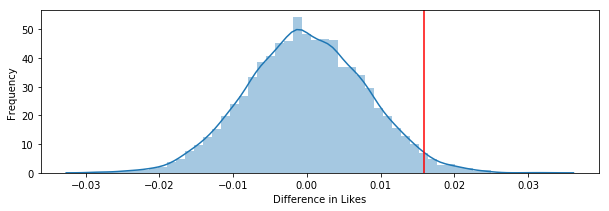

In [90]:
fig = plt.figure(figsize=(10,3))
ax = sns.distplot(dif_bootstrap_auc)

plt.xlabel('Difference in Likes')
plt.ylabel('Frequency')
plt.axvline(obs_difs, color='r')
plt.show()

### Bootstrap Hypothesis Testing LOS

In [91]:
combined = pd.concat([result_all_LOS,result_ch_LOS])

In [306]:
perms_all_LOS = []
perms_ch_LOS = []
perms_all_LOS_pr = []
perms_ch_LOS_pr = []
dif_bootstrap_auc = []
dif_bootstrap_pr = []

In [308]:
%%time
for i in range(10000):
    np.random.seed(i)
    perms_all_LOS_roc, perms_all_LOS_pr = calculate_roc_auc(resample(combined, n_samples = len(result_all_LOS)))
    perms_ch_LOS_roc, perms_ch_LOS_pr  = calculate_roc_auc(resample(combined, n_samples = len(result_ch_LOS)))
    dif_bootstrap_auc.append(perms_all_LOS_roc-perms_ch_LOS_roc)
    dif_bootstrap_pr.append(perms_all_LOS_pr-perms_ch_LOS_pr)

    


CPU times: user 1min 24s, sys: 0 ns, total: 1min 24s
Wall time: 1min 24s


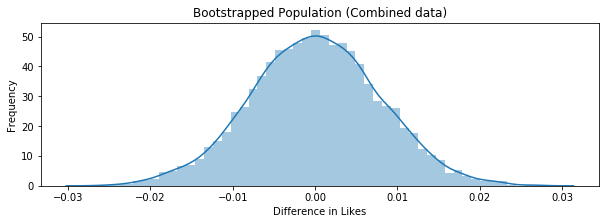

observed difference in AUROC: 0.008438554932420517
p-value: 0.1462


In [318]:
fig = plt.figure(figsize=(10,3))
ax = sns.distplot(dif_bootstrap_auc)

plt.xlabel('Difference in Likes')
plt.ylabel('Frequency')
plt.title('Bootstrapped Population (Combined data)')
plt.show()

# Observed Difference
obs_difs = (calculate_roc_auc(result_all_LOS)[0] - calculate_roc_auc(result_ch_LOS)[0])
print('observed difference in AUROC: {}'.format(obs_difs))
p_value = sum(dif_bootstrap_auc >= obs_difs)/10000
print('p-value: {}'.format(p_value))

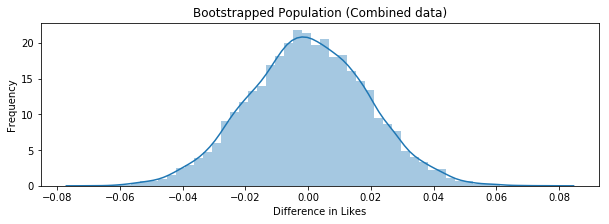

observed difference in PRAUC: 0.008509389884385099
p-value: 0.3281


In [317]:
fig = plt.figure(figsize=(10,3))
ax = sns.distplot(dif_bootstrap_pr)

plt.xlabel('Difference in Likes')
plt.ylabel('Frequency')
plt.title('Bootstrapped Population (Combined data)')
plt.show()

# Observed Difference
obs_difs = (calculate_roc_auc(result_all_LOS)[1] - calculate_roc_auc(result_ch_LOS)[1])
print('observed difference in PRAUC: {}'.format(obs_difs))
p_value = sum(dif_bootstrap_pr >= obs_difs)/10000
print('p-value: {}'.format(p_value))

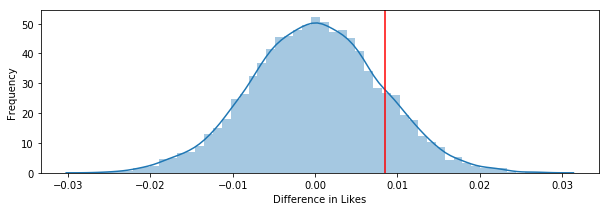

In [316]:
fig = plt.figure(figsize=(10,3))
ax = sns.distplot(dif_bootstrap_auc)

plt.xlabel('Difference in Likes')
plt.ylabel('Frequency')
plt.axvline(obs_difs, color='r')
plt.show()

In [165]:
from scipy.stats import mannwhitneyu

# compare samples
stat, p = mannwhitneyu(df_LOS['roc_auc_all_LOS'],df_LOS['roc_auc_ch_LOS'])
print('Statistics={}, p={}'.format(stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=13826277.0, p=0.0
Different distribution (reject H0)


In [166]:
from scipy.stats import wilcoxon

# compare samples
stat, p = wilcoxon(df_LOS['roc_auc_all_LOS'], df_LOS['roc_auc_ch_LOS'])
print('Statistics={}, p={}'.format(stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=3061065.0, p=0.0
Different distribution (reject H0)


In [151]:
result_all_mortality.head()

,Predictions,pred_1,actual
0,0.001,0.0,0
1,0.007,0.0,0
2,0.417,0.0,1
3,0.007,0.0,0
4,0.012,0.0,0


In [152]:
result_ch_mortality.head()

,Predictions,pred_1,actual
0,0.001,0.0,0
1,0.008,0.0,0
2,0.549,1.0,1
3,0.026,0.0,0
4,0.047,0.0,0


In [164]:
df_LOS.head()

,pr_auc_all_LOS,pr_auc_ch_LOS,roc_auc_all_LOS,roc_auc_ch_LOS,auc_diff_LOS
0,0.659290,0.651189,0.873376,0.865762,0.007614
1,0.676592,0.692100,0.880252,0.875685,0.004567
2,0.684260,0.649420,0.875378,0.864026,0.011351
3,0.684239,0.645216,0.879098,0.860821,0.018277
4,0.667693,0.695585,0.870177,0.874140,-0.003964


In [160]:
df_mortality['roc_auc_all_LOS']

10000

In [ ]:
df_mortality['roc_auc_ch_LOS']